# Part I - The Prosper Loan Data Analysis
## by Yahaya Yusuf Danladi

## Introduction

#### PROSPER LOAN AND HOW IT WORKS

Prosper is an online peer-to-peer lending marketplace, where creditworthy borrowers can request a loan and investors can invest in “notes” (or portions) of each loan.

After a borrower accepts their loan offer, Prosper may verify their application information. Upon borrower acceptance, investors have up to 14 days to commit funds to the loan through their Prosper account. Once a borrower passes any additional verification requirements and one or more investor(s) commit enough funds to the loan it's ready for origination.

Loans through Prosper are amortized, meaning borrowers make fixed monthly payments throughout the duration of their 3- or 5-year term. Each payment is comprised of principal, interest, and any applicable fees. Investors receive a portion of those payments that are proportional to their pro rata share of the loan. These funds are deposited directly into investors' Prosper Accounts.

As with any debt, there's always the risk that a borrower can default on their loan, which could result in a loss for the investor(s) who invested in the loan. Loans are unsecured obligations, meaning they are not secured by any collateral of the borrower. To assess the risk of each loan before committing funds, investors should review the loan request details and the Prospectus.

Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor.

**Prosper Rating 	Estimated Avg. Annual Loss Rate**
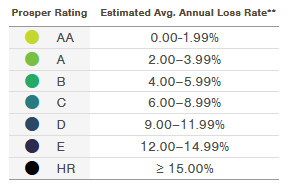




[Learn about Prosper's loan system](https://www.prosper.com/)

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
df_loan = pd.read_csv('ProsperLoanData.csv')

In [23]:
sum(df_loan.isna().any())

43

In [24]:
df_loan.isna().any().any()

True

In [ ]:
df_loan.head()

In [ ]:
df_loan.info()

In [ ]:
sum(df_loan.duplicated())

In [25]:
df_loan.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [ ]:
df_loan.describe()

In [ ]:
df_loan.shape

### Data Issues
    1. There alot of missing values especially in "CreditGrade" column.
    2. Some columns name aren't proper e.g "ProsperRating (numeric)".
    3. Inconsistent data in the "DateCreditPulled" column.
    4. Date column are not in datetime format.

### The Clean-up
To Clean up this Qualty and Tidiness issues, we are going to
1. Load only columns necessary for this analysis to a new dataframe called "df".
2. Drop rows with missing values and columns with inconsistent data.
3. Change date column to appropriate type (datetime).

In [2]:
#Load only Relevant (selected) fields
fields=['Term','BorrowerAPR','BorrowerRate','ProsperRating (numeric)','LenderYield','ProsperRating (Alpha)','ProsperScore','Occupation',
        'EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup','CurrentCreditLines',
       'TotalCreditLinespast7years','TotalInquiries','AmountDelinquent','DelinquenciesLast7Years',
       'AvailableBankcardCredit','DebtToIncomeRatio','LoanStatus','IncomeRange','LoanNumber','LoanOriginalAmount',
       'LoanOriginationDate','LoanOriginationQuarter','MonthlyLoanPayment','PercentFunded','Recommendations',
       'InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']

df = pd.read_csv('ProsperLoanData.csv', skipinitialspace=True, usecols=fields)

In [3]:
# Drop rows with missing value
df.dropna(inplace=True)

In [4]:
# Rename some columns
df.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric','ProsperRating (Alpha)':'ProsperRatingAlpha'}, inplace = True)

In [5]:
# Convert date fields to datetime format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Term                         76224 non-null  int64         
 1   LoanStatus                   76224 non-null  object        
 2   BorrowerAPR                  76224 non-null  float64       
 3   BorrowerRate                 76224 non-null  float64       
 4   LenderYield                  76224 non-null  float64       
 5   ProsperRatingNumeric         76224 non-null  float64       
 6   ProsperRatingAlpha           76224 non-null  object        
 7   ProsperScore                 76224 non-null  float64       
 8   Occupation                   76224 non-null  object        
 9   EmploymentStatus             76224 non-null  object        
 10  IsBorrowerHomeowner          76224 non-null  bool          
 11  CurrentlyInGroup             76224 non-n

In [149]:
df.shape

(76224, 30)

### Dataset Structure

Originality the dataset contains a total of 113,937 entries(rows) and 81 colums, 61 columns contains numerical data, while quite a number of rows have missing values. However we find it necessary to work only with 30 relevant columns that are of interest to our analysis and also drop some rows due to missiong values, so, we end up working with 76,224 rows and 30 columns. 

### Main feature(s) of interest in dataset

In this dataset, the major features of interest that we will be focusing on in this analysis to establish relationships and draw insights are:

    1. ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created
    2. IsBorrowerHomeowner: A Borrower will be classified as homowner if they have a mortgage on their credit profile.
    3. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
    4. LoanOriginalAmount: The origination amount of the loan.
    5. Recommendations: Number of recommendations the borrower had at the time the listing was created.
    
This will help us see if home owners collects loans more, how likely it is for friend to invest in the loans and if belong to a groups or society has any influence in securing loan.

### Other supporting features for investigation into feature(s) of interest?

 Other features that can help us gain better understanding of these feature of interest includes:

    1. Term: The length of the loan expressed in months.
    2. BorrowerRate: The Borrower's interest rate for this loan. 
    3. ProsperScore: A custom risk score built using historical Prosper data.
    4. Occupation: The Occupation selected by the Borrower at the time they created the listing.
    5. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
    6. CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
    7. CurrentCreditLines: Number of current credit lines at the time the credit profile was pulled.
    8. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled.
    9. IncomeRange: The income range of the borrower at the time the listing was created.
    10. LoanOriginationQuarter: The quarter in which the loan was originated.
    11. MonthlyLoanPayment: The scheduled monthly loan payment.
    12. PercentFunded: Percent the listing was funded.
    13. Recommendations: Number of recommendations the borrower had at the time the listing was created.
    14. InvestmentFromFriendsCount: Number of friends that made an investment in the loan.


## Univariate Exploration

### Question 1: What Percentage of borrowers are Homeowners?

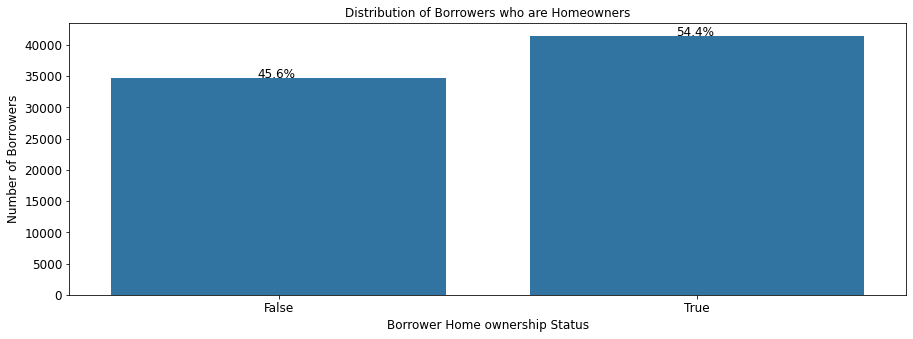

In [37]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    

base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('IsBorrowerHomeowner', data = df, color=base_color)
plt.title('Distribution of Borrowers who are Homeowners', size = 12)
plt.xticks(size = 12)
plt.xlabel('Borrower Home ownership Status', size = 12)
plt.yticks(size = 12)
plt.ylabel('Number of Borrowers', size = 12);
without_hue(ax,df.IsBorrowerHomeowner);

#### Observation.
It can be seen that most of the borrowers in the prosper loan system are also homeowners, might be why inventestor feel comforcomfortable investing in them we need to investigate this further.

---------------------------------------------------------------------------

### Question 2: What is the distribution of borrower by their employment status?

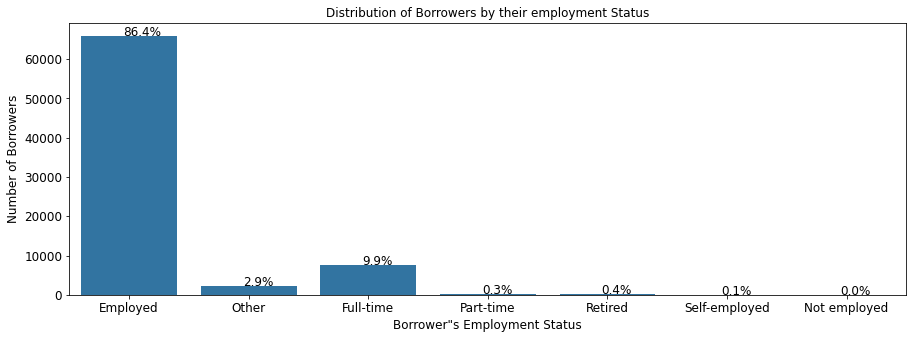

In [39]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('EmploymentStatus', data = df, color=base_color)
plt.title('Distribution of Borrowers by their employment Status', size = 12)
plt.xticks(size = 12)
plt.xlabel('Borrowers Employment Status', size = 12)
plt.yticks(size = 12)
plt.ylabel('Percentage of Borrowers', size = 12);
without_hue(ax,df.IsBorrowerHomeowner);

#### Observation

We see that 86% percent of the borrower are employed, which could facilitate their payback.

-----------------------

### Question 3: How often do people invest in their friends listing?

In [9]:
df.groupby(['InvestmentFromFriendsCount'])['InvestmentFromFriendsCount'].count().plot(kind='bar', title='Disttribution of Borrowers by Home Ownership')#.set_label(x_label='Number of Borrowers');
plt.xlabel('Borrowers Home Ownership Status')
plt.ylabel('Number of Borrowers')
df.groupby(['InvestmentFromFriendsCount'])[['InvestmentFromFriendsCount']].count()

InvestmentFromFriendsCount
InvestmentFromFriendsCount                            
0                                                75739
1                                                  430
2                                                   40
3                                                    8
4                                                    2
5                                                    2
6                                                    2
9                                                    1

#### Observation
We see most of the investments came from non-friends (i.e the 75,739 which is 99% of total listed loans were from non-friend),  could it be that pepeople are more comfortable investing in non-friends than friend? this is a point of further investigations.

------------------------------------------

### Question 4: What is the distribution of borrowers across the Prosper Risk Scores?

In [40]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('ProsperRatingNumeric', data = df, color=base_color)
plt.title('Distribution of Borrowers by Prosper risk score', size = 12)
plt.xticks(size = 12)
plt.xlabel('Prosper Borrower Rating', size = 12)
plt.yticks(size = 12)
plt.ylabel('Percentage of Borrowers', size = 12);
without_hue(ax,df.ProsperRatingNumeric);

#### Observation

We see that majority (22%) of the borrowers are on the 4.0 prosper rating mark.

------------------------

### Question 5: What is the distribution of fully funded loans?

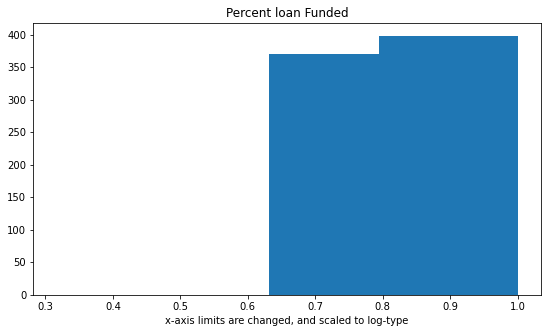

In [54]:
# Axis transformation
# Define the figure size
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
# Bin size
bins = 10 ** np.arange(-0.5, 0.1, 0.1)
plt.hist(data=df, x='PercentFunded', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
#plt.xscale('log')

# Apply Title & x-axis label
plt.title('Percent loan Funded')
plt.xlabel('x-axis limits are changed, and scaled to log-type');

#### Observation

We observed that majority of the loans were funded 100%.

------------------------

### Question 6: On which day of the week are most loans originated.

LoanOriginationDate
Friday       15150
Monday       12044
Thursday     14751
Tuesday      17422
Wednesday    16857
Name: LoanOriginationDate, dtype: int64

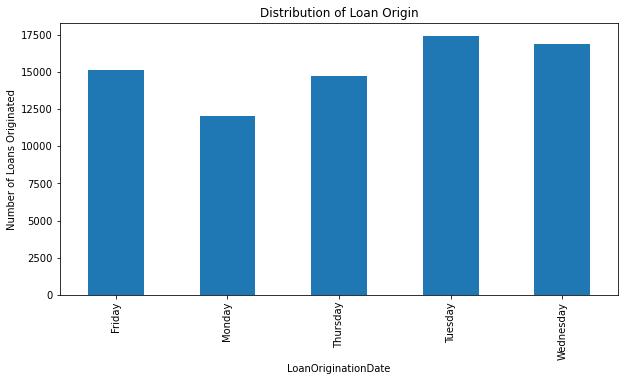

In [59]:
weekdays = df['LoanOriginationDate'].dt.day_name() #get the week day name of each scheduled date
df.groupby(weekdays)['LoanOriginationDate'].count().plot(kind='bar',figsize= (10,5), title='Distribution of Loan Origin').set_ylabel('Number of Loans Originated');
df.groupby(weekdays)['LoanOriginationDate'].count()

#### Observation
A good number of loans originated on tuesdays

--------------------

### Question 7: What Percentage of borrowers belong to any group

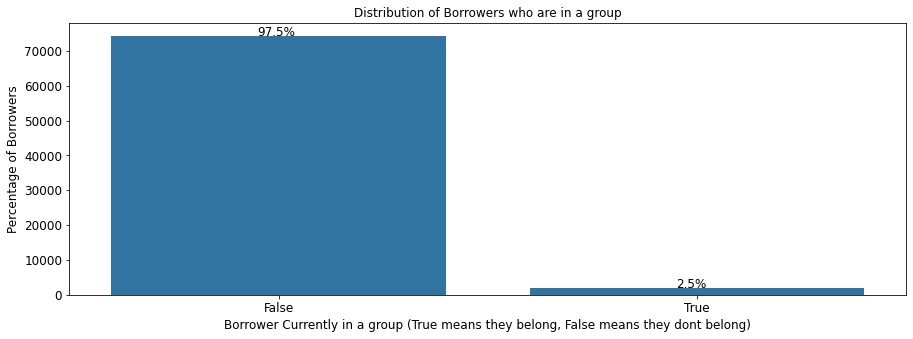

False    74294
True      1930
Name: CurrentlyInGroup, dtype: int64

In [151]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('CurrentlyInGroup', data = df, color=base_color)
plt.title('Distribution of Borrowers who are in a group', size = 12)
plt.xticks(size = 12)
plt.xlabel('Borrower Currently in a group (True means they belong, False means they dont belong)', size = 12)
plt.yticks(size = 12)
plt.ylabel('Percentage of Borrowers', size = 12);
without_hue(ax,df.CurrentlyInGroup);
df['CurrentlyInGroup'].value_counts()

#### Observation
97% (74,294) borrowers do not belong to any group.

------------

### Question 8: What is the distribuiton loan amounts?

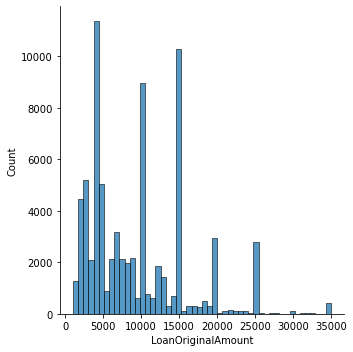

In [85]:
sb.displot(df['LoanOriginalAmount'], kind='hist', bins=50);

#### Observation
We can see that generally most of the borrowers usually borrow an amount of $4,000.

--------------------------

### Question 9:  What is the most common borrowing interest rate

0.3177    2990
0.3199    1329
0.2699    1139
0.1099     835
0.1585     707
          ... 
0.3178       1
0.3094       1
0.3269       1
0.2784       1
0.2665       1
Name: BorrowerRate, Length: 1170, dtype: int64

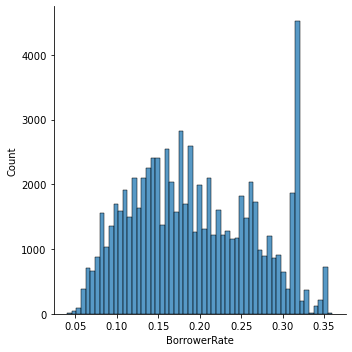

In [32]:
sb.displot(df['BorrowerRate'], kind='hist');
df['BorrowerRate'].value_counts()

#### Observation
The distribution is almost a normal curve, however we see a spike around the 31% interest rate, which indicates that the most common borrowing interest rate is 31%.

--------------------

### Questions 10: What is the distribution of borrowers who got recommendations?

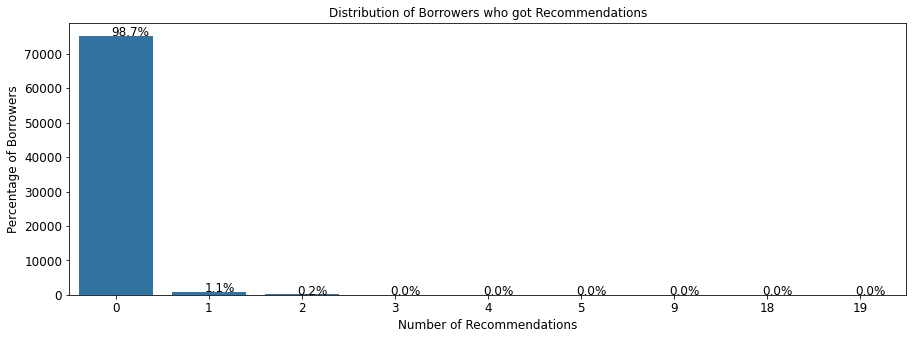

0     75196
1       875
2       129
3        16
5         2
4         2
18        2
19        1
9         1
Name: Recommendations, dtype: int64

In [155]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,5))
ax = sb.countplot('Recommendations', data = df, color=base_color)
plt.title('Distribution of Borrowers who got Recommendations', size = 12)
plt.xticks(size = 12)
plt.xlabel('Number of Recommendations', size = 12)
plt.yticks(size = 12)
plt.ylabel('Percentage of Borrowers', size = 12);
without_hue(ax,df.Recommendations);
df['Recommendations'].value_counts()

#### Observation
98% (75,196) of the borrowers do not have any recommendations for collecting loans. 
Does recommentations increases changes of get larger amount of loans?.

-------------

### Discussion (Univariate Exploration)
The data contains 81 features, of which we don't need all for our analysis, hence we find it necessary to load only columns that we will utilize to the dataframe called "df". For features with inconsistent and missing data, we drop the affected rows, also we rename the *ProsperRating (numeric)* and *ProsperRating (Alpha)* to *ProsperRatingNumeric* and *ProsperRatingAlpha* then we chage the *LoanOriginationDate* to datetime format.

There are 30 variable selected for this analysis with 7,6224 rows each, Primarimy, the feature of interest that we exlpored are: IsBorrowerHomeowner, EmploymentStatus, ProsperRatingNumeric, PercentFunded, LoanOriginalAmount,and Recommendations colums.

Upon exploring the variables univariately, we saw that majority of the borrowers in the Prosper loan system are also homeowners, 86% percent of the borrower are employed, most (99%) of the investments came from non-friends, and 22% of borrowers are on the 4.0 risk score.
Also, we saw that majority of the loans were funded 100%, a good number of the loans originated on tuesdays, 97% (74,294) borrowers do not belong to any group, majority of borrowers borrow loans of about 4,000 only with very few who borrow above $15,000. Many of the loans attract 31% interest rate, and recommend didn play much role in qualifying for loan as 98% (75,196) of the borrowers do not have any recommendations.


## Bivariate Exploration

### Question 11: What is the relationship between Borrowing rate and loan amount?

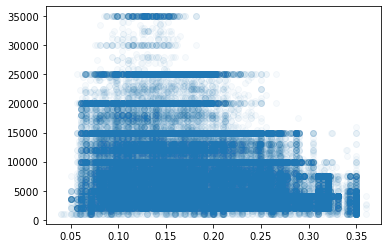

In [93]:
plt.scatter(data = df, x = 'BorrowerRate', y = 'LoanOriginalAmount',alpha=1/30);

#### Observation

The correlation the between Borrowing rate and loan amount is negative, as the borrowing rate increases, the loan amount decreases. in other words we can say the smaller the amount you borrow, the higher the borrowing rates.

-------------------

### Question 12: What is the Correlation between the Loan Amount and the Lenders yield?

Text(0, 0.5, 'Loan Original Amount')

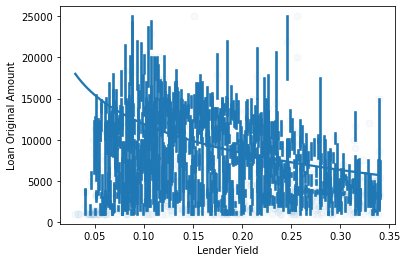

In [36]:
sb.regplot(x="LenderYield", y="LoanOriginalAmount", data=df, x_estimator=np.mean,scatter_kws = { 'alpha' : 1/30}, logx=True);
plt.xlabel('Lender Yield')
plt.ylabel('Loan Original Amount');

#### Observation

We can see a negative correlation between the amount of loan and the interest from such amounts. it seems the hight the loan amount the lower the interest it yields.

### Question 13: How is the prosper Score compared to the Loan amounts given to borrows

In [10]:
sb.regplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', x_jitter=0.3, scatter_kws = { 'alpha' : 1/20});
plt.xlabel('Prosper Score')
plt.ylabel('Loan Amount')

Text(0, 0.5, 'LoanOriginalAmount')

#### Observation

We can see some positive correlation between the Prosper score and the loan amount given to borrowers. i.e. the higher the prosper score the more the amount a borrower is likely to get.

-----------------

### Question 14: What is the Relationship between Recommendations and loan amount?

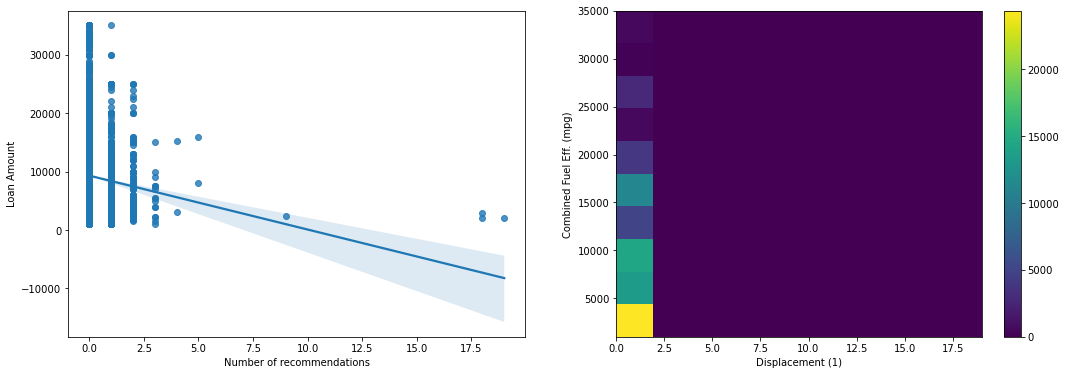

In [117]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.regplot(data = df, x = 'Recommendations', y = 'LoanOriginalAmount');
plt.xlabel('Number of recommendations')
plt.ylabel('Loan Amount')

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'Recommendations', y = 'LoanOriginalAmount')
plt.colorbar()
plt.xlabel('Number of recommendations')
plt.ylabel('Loan Amount')

#### Observation

The correlations is negative between the Loan amount and the recommendations, we see majority of the borrowers got even large amount of loans with little or no recommendations.

-------------------

### Question 15: Does home ownership contributes in determining the loan amount a borrower gets?

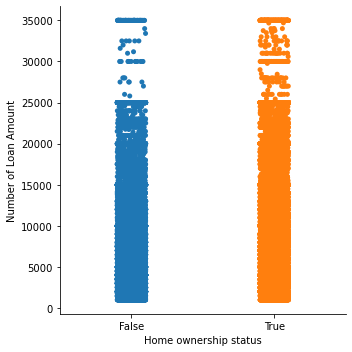

In [109]:
sb.catplot(data=df, x="IsBorrowerHomeowner", y="LoanOriginalAmount");
plt.xlabel('Home ownership status')
plt.ylabel('Number of Loan Amount');

#### Observation

Generally, the same loan Amount is given to borrowers regardless whether they own a home or not.

------------

### Discussion (Bivariate Exploration)
Plotting the Borrowing rate against the loan amount. we see a negative correlation i.e. the smaller the loan amount, the higher the borrowing rates. Checkingout the  loan amount against the lenders yield, we see that the higher the loan amount the lower the interest it yields to the lender(Investor).

We can see some positive correlation between the Prosper score and the loan amount given to borrowers, and a weak negative correlation between the Loan amount and the recommendations, we see majority of the borrowers got large amount of loans with little or no recommendations.

Generally, we observed that the same loan Amount is given to borrowers regardless whether they own a home or not.

## Multivariate Exploration

### Question 16: Is there any relationship between the Prosper Score and Recommendations?

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


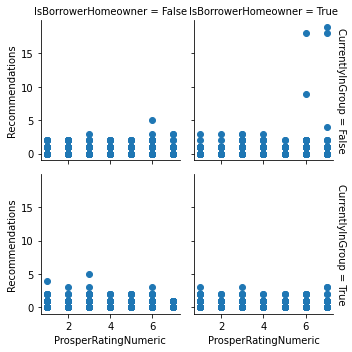

In [148]:
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', row = 'CurrentlyInGroup', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'ProsperRatingNumeric', 'Recommendations');

#### Observation
Majority of the borrowers got few recommendations or non at all, only very few borrowers that seems to appear amongst homeowners and those currently not in a group, but there is no correlations between Prosper ratings and recommendations.

------------------

### Question 17: Does Employment Status affect the Prosper Score of a borrowers?

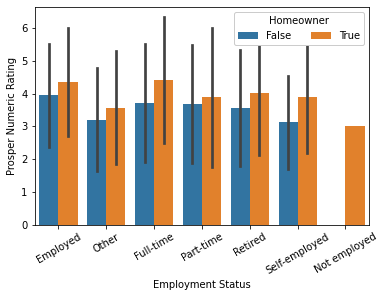

In [146]:
ax = sb.barplot(data = df, x = 'EmploymentStatus', y = 'ProsperRatingNumeric', hue = 'IsBorrowerHomeowner',ci = 'sd')
ax.legend(loc = 0, ncol = 2, framealpha = 1, title = 'Homeowner')
plt.xticks(rotation = 30)
plt.xlabel('Employment Status')
plt.ylabel('Prosper Numeric Rating');

#### Observation

Generally, we can see that borrowers that have some source of income or employment and are also homeowners have better ratings, hence we can say a borrowers employment status affect their rating.

---------------

### Discussion (Multivariate Exploration)
Upon investigating the relations between the recommendations and Prosper ratings, we see that Majority of the borrowers got few recommendations or non at all, and there is no correlations between Prosper ratings and recommendations.

Generally, borrowers that have some source of income or employment and are also homeowners have better ratings, hence we can say a borrowers employment status affect his/her rating.

## Conclusions

Wrangling the data we found some issues with the data i.e.:
1. There alot of missing values especially in "CreditGrade" column.
2. Some columns name aren't proper e.g "ProsperRating (numeric)".
3. Inconsistent data in the "DateCreditPulled" column.
4. Date column are not in datetime format.

Then we Clean-up by:
1. Load only columns necessary for this analysis to a new dataframe called "df".
2. Drop rows with missing values and columns with inconsistent data.
3. Change date column to appropriate type (datetime).

We worked with the IsBorrowerHomeowner, EmploymentStatus, ProsperRatingNumeric, LoanOriginalAmount,and Recommendations colums as features of interest. We found out that majority of the borrowers in the Prosper loan system are also homeowners, 86% percent of the borrower are employed, most (99%) of the investments came from non-friends, and 22% of borrowers are on the 4.0 risk score. Also, majority of borrowers borrow loans of about 4,000 dollars only with very few who borrow above 15,000 dollars. Many of the loans attract 31% interest rate, and recommend didn play much role in qualifying for loan as 98% (75,196) of the borrowers do not have any recommendations.

We can see some positive correlation between the Prosper rating and the loan amount given to borrowers, and a weak negative correlation between the Loan amount and the recommendations, we see majority of the borrowers got large amount of loans with little or no recommendations the we observed that the same loan Amount is given to borrowers regardless whether they own a home or not. Investigating the relations between the recommendations and Prosper rating, there is no correlations between Prosper score and recommendations.

Generally, borrowers that have some source of income or employment and are also homeowners have better ratings, hence we can say a borrowers employment status affect their rating.


## Reference

1. https://www.prosper.com/
2. https://www.investopedia.com/prosper-personal-loans-review-4843741
3. https://www.lawinsider.com/dictionary/loan-listing.
4. https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline